In [1]:
%cd ../..

d:\analitica\pruebas\mlii\comparacion-cnn-clasico-cuantico


# Exploración de datos

## Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
from python.metadata.path import Path
from python.feature_engineering.utils.exploratory import plot_images_from_path
from python.feature_engineering.utils.exploratory import show_random_image
from python.feature_engineering.utils.exploratory import plot_label_distribution
from python.feature_engineering.utils.exploratory import analyze_image_statistics
from python.feature_engineering.utils.exploratory import check_image_quality
from python.feature_engineering.utils.exploratory import images_to_pixel_vectors

## Entendimiento del Conjunto de Datos

In [4]:
train_df = pd.read_csv(Path.train_binary)
test_df = pd.read_csv(Path.test_binary)

In [5]:
train = pd.read_csv(Path.train)
test = pd.read_csv(Path.test)
val = pd.read_csv(Path.val)

In [6]:
print(f'El tamaño del dataset es: {train.shape}')
print(f'El tamaño del dataset es: {test.shape}')
print(f'El tamaño del dataset es: {val.shape}')

El tamaño del dataset es: (28292, 2)
El tamaño del dataset es: (8842, 2)
El tamaño del dataset es: (7074, 2)


In [7]:
portrait_df = pd.concat([train_df, test_df])

In [8]:
portrait_df.head()

,x:image,y:label
0,.\other\007720.png,0
1,.\portrait\10575.png,1
2,.\other\flower_0122.png,0
3,.\portrait\09197.png,1
4,.\portrait\07845.png,1


In [9]:
print(f'El tamaño del dataset es: {portrait_df.shape}')
print(f'El tamaño del dataset de entrenamiento es: {train_df.shape}')
print(f'El tamaño del dataset de prueba es: {test_df.shape}')

El tamaño del dataset es: (44208, 2)
El tamaño del dataset de entrenamiento es: (35366, 2)
El tamaño del dataset de prueba es: (8842, 2)


In [10]:
data = pd.concat([train, test, val])

In [11]:
data.shape

(44208, 2)

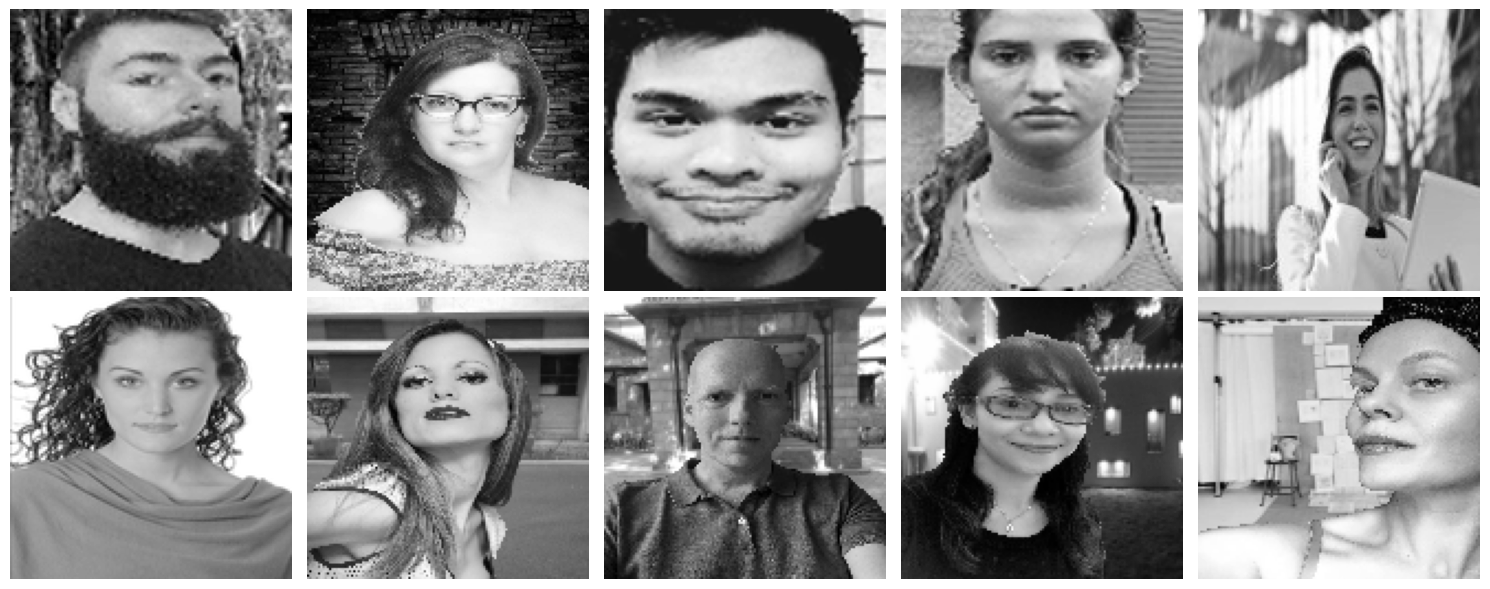

In [12]:
plot_images_from_path(
    path=Path.portrait, 
    save_path=Path.images_grid_portrait,
)

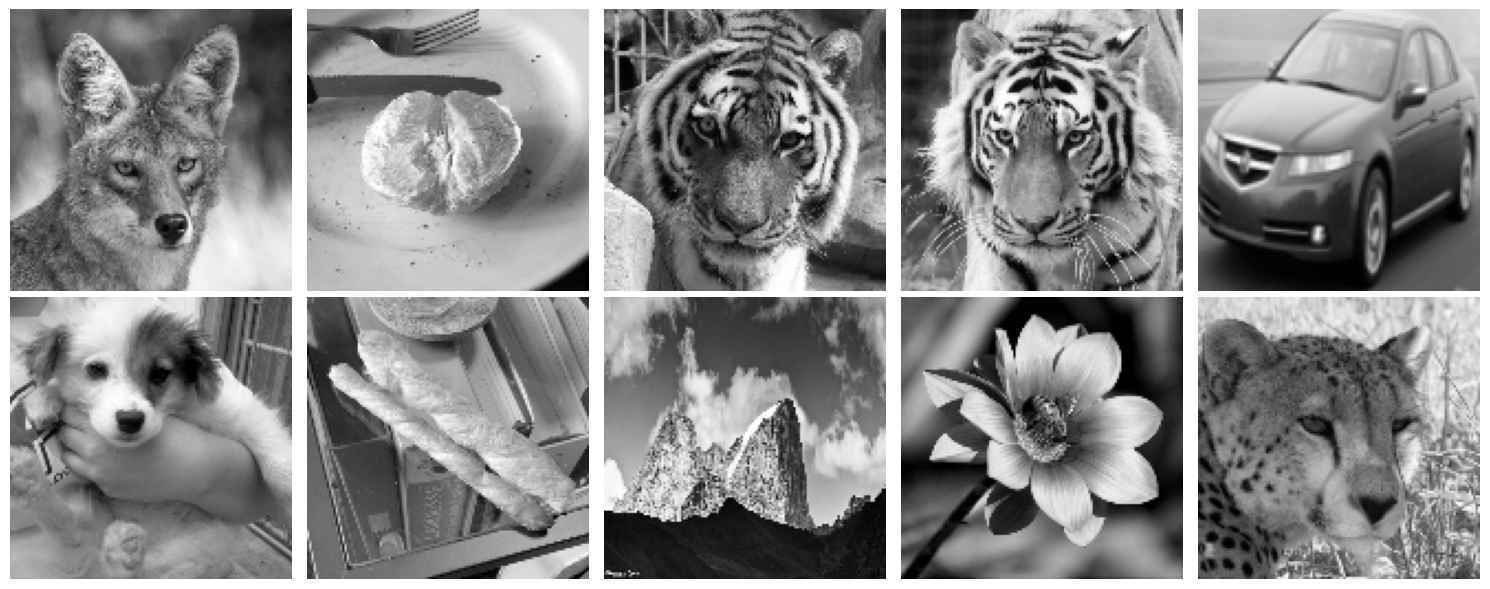

In [13]:
plot_images_from_path(
    path=Path.other, 
    save_path=Path.images_grid_other,
)

(128, 128)


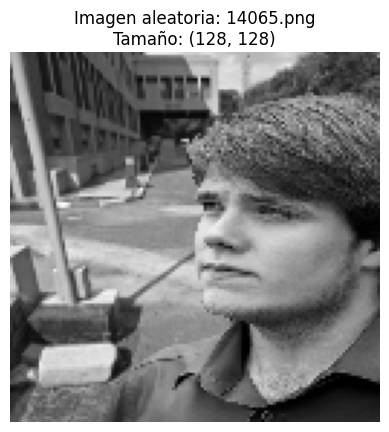

In [14]:
show_random_image(Path.portrait)

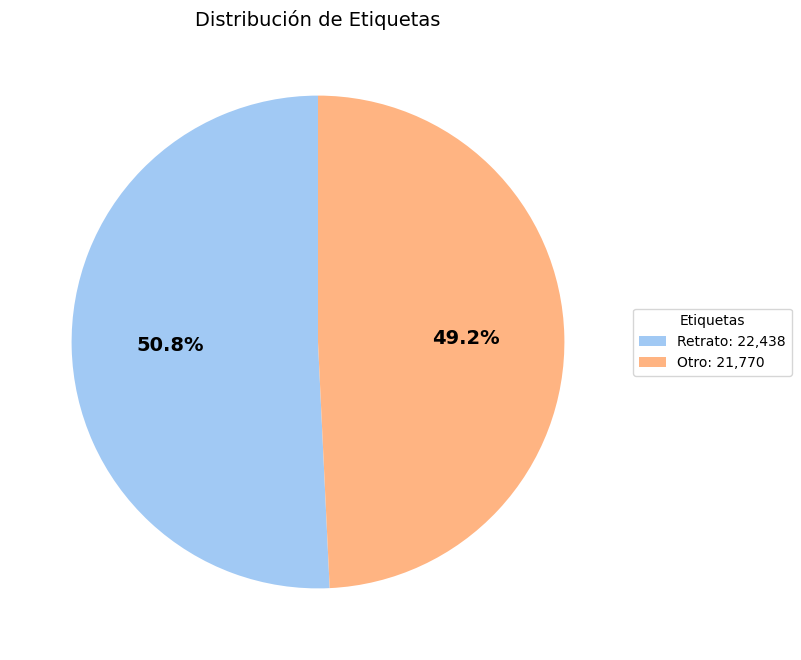

In [15]:
plot_label_distribution(portrait_df, 'y:label', save_path=Path.label_distribution)

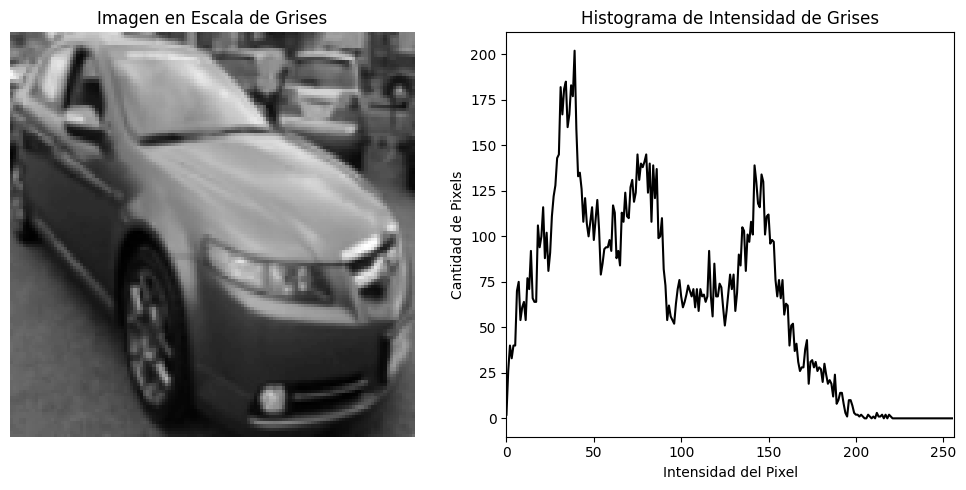

Estadísticas de brillo para output\binary\other\car_0151.png:
Media: 83.41, Desviación estándar: 48.84



In [16]:
analyze_image_statistics(random.choice(data['path'].tolist()))

In [ ]:
check_image_quality(data['path'])

In [17]:
pixel_vectors = images_to_pixel_vectors(data['path'])

In [18]:
pixel_vectors[0].shape

(16384,)